# índice

[Dataset](https://www.kaggle.com/code/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets)

1. [Importamos las librerías necesarias](#Importamos-las-librerías-necesarias)
2. [Cargamos los datos](#Cargamos-los-datos)
3. [Analizando el dataset](#Analizando-el-dataset)
4. [Buscando correlaciones para nuestro modelo](#Buscando-correlaciones-para-nuestro-modelo)
    1. [Observando Outliers](##Observando-Outliers)
5. [Submuestreo](#Submuestreo)
    1. [Modelos](#Modelos)
        * [KNN vecinos](###KNN-vecinos)
            - [Seleccionando los mejores hiperparámetros](####Seleccionando-los-mejores-hiperparametros)
            - [Graficando el mejor vecino](####Graficando-el-mejor-vecino)
        * [Modelo de regresion logistica](###Modelo-de-regresion-logistica)
        * [Modelo de arboles de desicion](###Modelo-de-arboles-de-desicion)
        * [Maquina de vectores de soporte (SVM)](###Maquina-de-vectores-de-soporte-(SVM))
        * [XGBoost](###XGBoost)
        * [Red Neuronal](###Red-Neuronal)

# Importamos las librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
from tensorflow import keras
from tensorflow.keras import layers


# Cargamos los datos

In [2]:
df = pd.read_csv('creditcard.csv')

# Analizando el dataset

In [3]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
for c in df.columns:
    cantidad_nulos = df[c].isnull().sum()
    print(f'La cantidad de nulos de la columna {c} es de {cantidad_nulos}')

La cantidad de nulos de la columna Time es de 0
La cantidad de nulos de la columna V1 es de 0
La cantidad de nulos de la columna V2 es de 0
La cantidad de nulos de la columna V3 es de 0
La cantidad de nulos de la columna V4 es de 0
La cantidad de nulos de la columna V5 es de 0
La cantidad de nulos de la columna V6 es de 0
La cantidad de nulos de la columna V7 es de 0
La cantidad de nulos de la columna V8 es de 0
La cantidad de nulos de la columna V9 es de 0
La cantidad de nulos de la columna V10 es de 0
La cantidad de nulos de la columna V11 es de 0
La cantidad de nulos de la columna V12 es de 0
La cantidad de nulos de la columna V13 es de 0
La cantidad de nulos de la columna V14 es de 0
La cantidad de nulos de la columna V15 es de 0
La cantidad de nulos de la columna V16 es de 0
La cantidad de nulos de la columna V17 es de 0
La cantidad de nulos de la columna V18 es de 0
La cantidad de nulos de la columna V19 es de 0
La cantidad de nulos de la columna V20 es de 0
La cantidad de nulos 

Encontramos en este DataFrame varias columnas sin nombre por una cuestión de privacidad de datos. Sin embargo, existen tres columnas que tienen nombres: i. Time, ii. Amount y iii. Class. Veamos cada una de ellas. Por otro lado, este DataFrame no tiene nulos.

In [6]:
#Valores únicos por columna
columnas = ['Time', 'Amount', 'Class']

for c in columnas:
    cantidad_unicos = df[c].nunique()
    print(f'La columna {c} tiene {cantidad_unicos} valores únicos')

La columna Time tiene 124592 valores únicos
La columna Amount tiene 32767 valores únicos
La columna Class tiene 2 valores únicos


¿Cuáles son los valores únicos de 'Class'?

In [7]:
df['Class'].unique()

array(["'0'", "'1'"], dtype=object)

Transformamos esta columna a numérica.

In [8]:
df.loc[df['Class'].str.contains('1'), 'Class'] = 1

In [9]:
df.loc[df['Class']!=1, 'Class'] = 0

In [10]:
df['Class'] = pd.to_numeric(df['Class'])

La columna Class nos indica si la transacción es o no fraudulenta. Amount nos informa respecto del monto de transacción, mientras que time el momento en el que se ejecutó la operación.

Observemos el porcentaje de transacciones fraudulentas.

In [11]:
porcentaje_fraudulentas = round((len(df.loc[df['Class']==1, 'Class'])*100)/df.shape[0], 2)
porcentaje_sin_fraude = round((len(df.loc[df['Class']==0, 'Class'])*100)/df.shape[0], 2)

print(f'El porcentaje de transacciones fraudulentas es de {porcentaje_fraudulentas}%, mientras que el de no fraudulentas es de {porcentaje_sin_fraude}%')

El porcentaje de transacciones fraudulentas es de 0.17%, mientras que el de no fraudulentas es de 99.83%


Gràficamente esto se expresa de la siguiente manera:

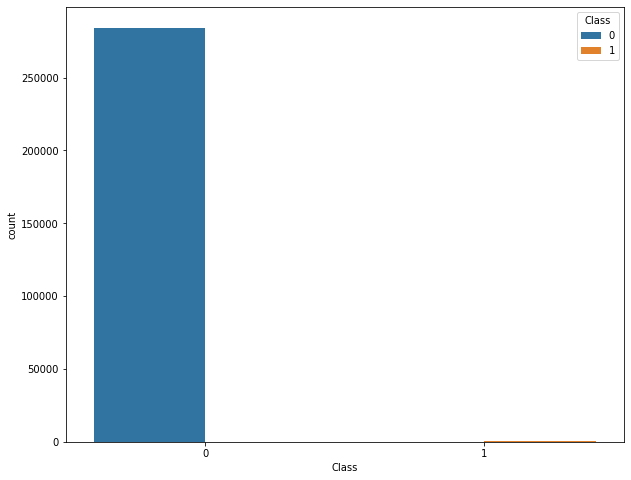

In [12]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='Class', hue='Class')
plt.show()

Nuestro DataFrame se encuentra completamente desbalanceado. Tenemos muy pocas transacciones que no son fraudulentas para poder generar un modelo de Machine Learning.

# Buscando correlaciones para nuestro modelo

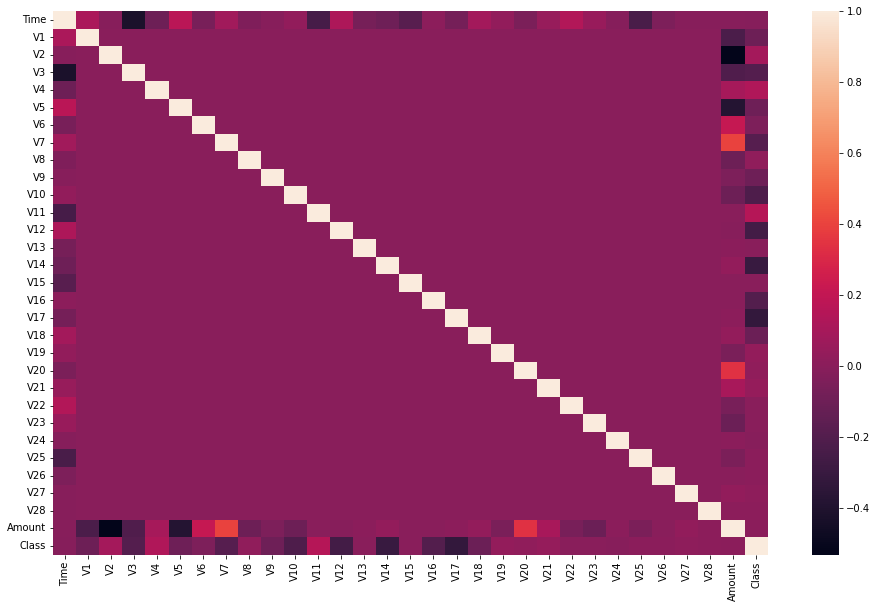

In [13]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr())
plt.show()

Aunque no sabemos qué significa cada columna podemos encontrar que existe una serie de correlaciones negativas a tener en cuenta:
1. Columnas correlacionadas negativamente con 'Class': 'V10', 'V12', 'V14' y 'V17'.
2. Columnas correlacionadas positivamente (de manera ligera) con 'Class': 'V2', 'V4' y 'V11'.

## Observando Outliers

Observemos los outliers de las columnas con correlación negativa y correlación positiva.

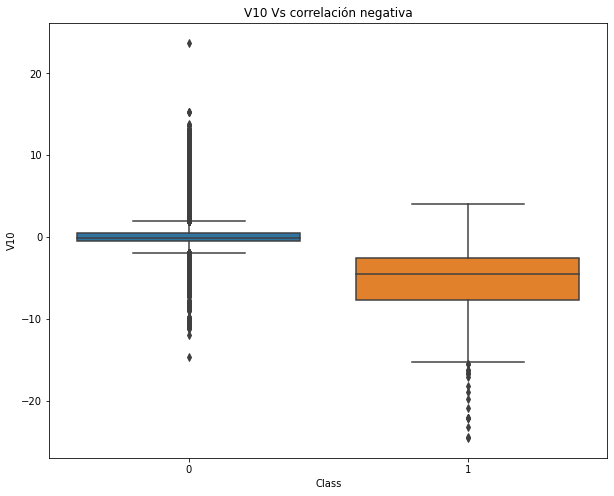

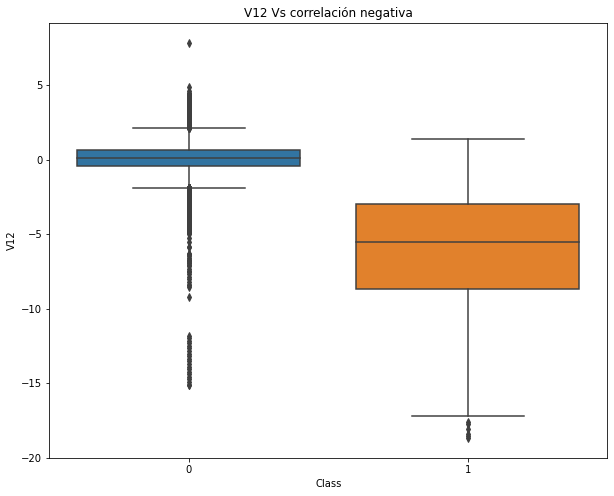

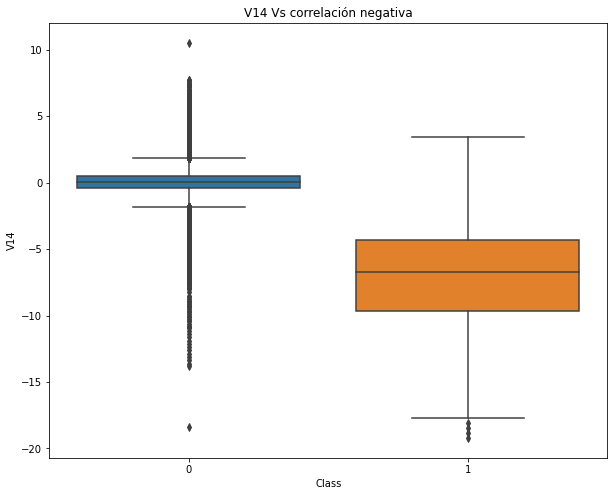

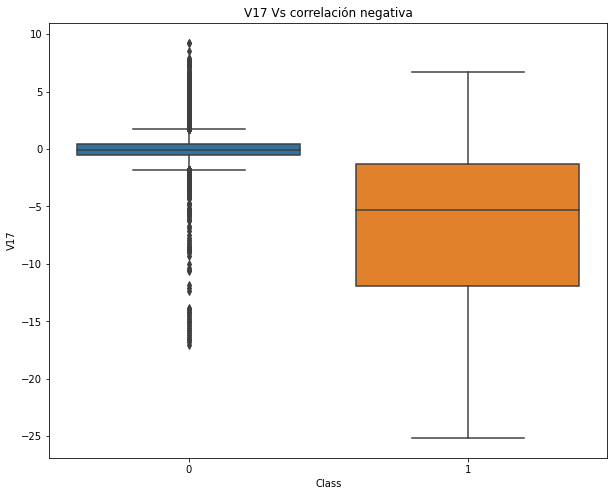

In [14]:
corrlacion_negativa = ['V10', 'V12', 'V14', 'V17']

for i in corrlacion_negativa:
    plt.figure(figsize=(10,8))
    sns.boxplot(data=df, x='Class', y=i)
    plt.title(f'{i} Vs correlación negativa') 
    plt.show()

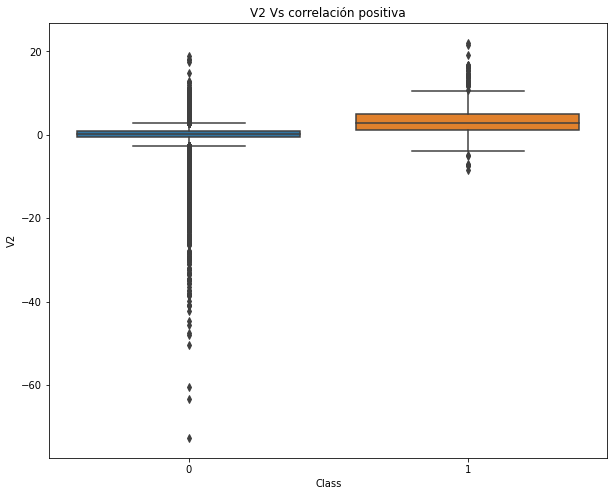

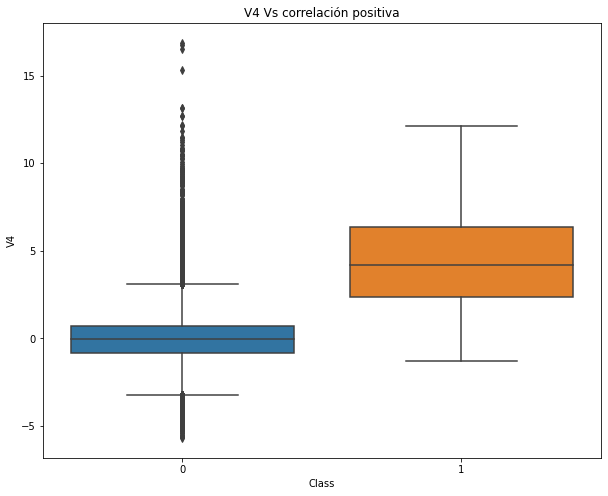

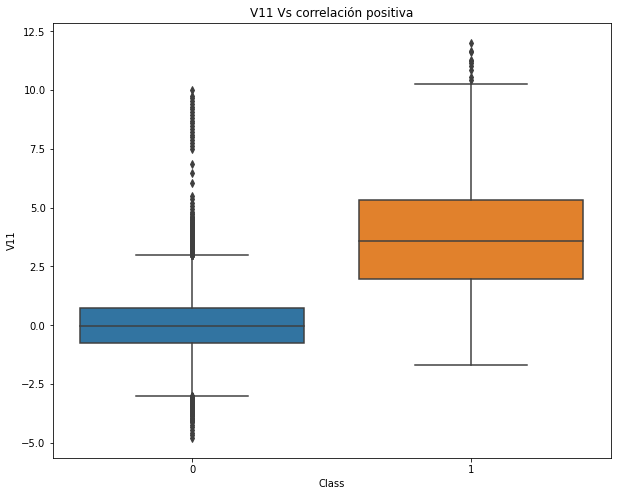

In [15]:
corrlacion_negativa = ['V2', 'V4', 'V11']

for i in corrlacion_negativa:
    plt.figure(figsize=(10,8))
    sns.boxplot(data=df, x='Class', y=i)
    plt.title(f'{i} Vs correlación positiva') 
    plt.show()

Para tratar con los outliers al momento de generar nuestro modelo utilizaremos el escalado robusto.

# Submuestreo

Vamos a crear un DataFrame que tenga el 50% de transacciones fraudulentas y 50% de transacciones no fraudulentas.

In [16]:
con_fraude = df[df['Class']==1]
sin_fraude = df[df['Class']==0].iloc[0:con_fraude.shape[0]]

#Concatenamos ambos DataFrames
concatenado = pd.concat([con_fraude, sin_fraude])

Observamos que nuestro DataFrame tenga los valores distribuidos por igual.

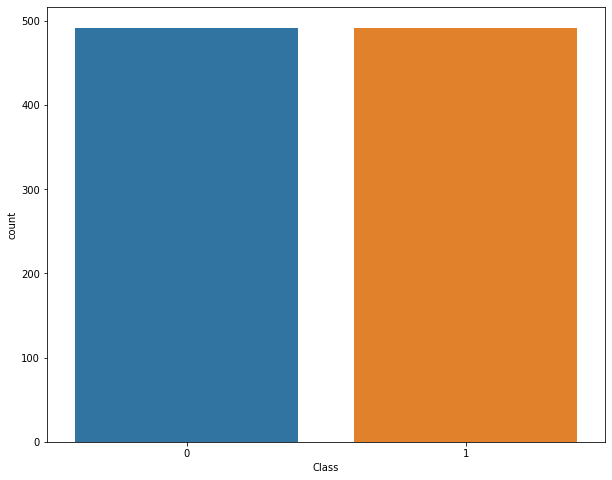

In [17]:
plt.figure(figsize=(10,8))
sns.countplot(data=concatenado, x='Class')
plt.show()

# Modelos

### KNN vecinos

In [18]:
X = concatenado[['V10', 'V12', 'V14', 'V17', 'V2', 'V4', 'V11']].values
y = concatenado['Class'].values

#Separamos los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#Escalamos los datos
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Seleccionamos un número de vecinos
vecinos = 3
peso = 'distance'

#Establecemos nuestro modelo
knn = KNeighborsClassifier(vecinos, weights='distance')
knn.fit(X_train, y_train)
print('Precisión del clasificador KNN en el conjunto de entrenamiento ', round(knn.score(X_train, y_train), 2))
print('Precisión del clasificador KNN en el conjunto de prueba ',round(knn.score(X_test, y_test), 2))

Precisión del clasificador KNN en el conjunto de entrenamiento  1.0
Precisión del clasificador KNN en el conjunto de prueba  0.95


#### Seleccionando los mejores hiperparametros

In [19]:
from sklearn.model_selection import GridSearchCV, train_test_split

param_grid = {
    'n_neighbors': [3, 5, 7, 9],    # Número de vecinos
    'weights': ['uniform', 'distance'],  # Peso de los vecinos ('uniform' o 'distance')
}

grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor puntuación en validación cruzada:", grid_search.best_score_)

Mejores hiperparámetros: {'n_neighbors': 3, 'weights': 'distance'}
Mejor puntuación en validación cruzada: 0.922770729913587


#### Graficando el mejor vecino

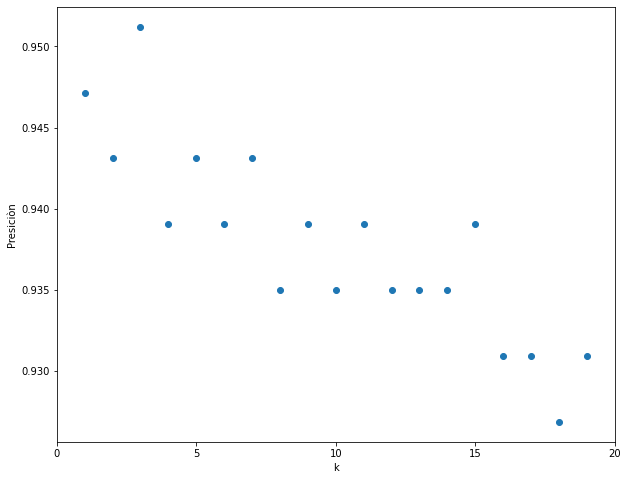

In [20]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure(figsize=(10,8))
plt.xlabel('k')
plt.ylabel('Presiciòn')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()

Graficamos nuestra matriz de confusión relativa a este modelo

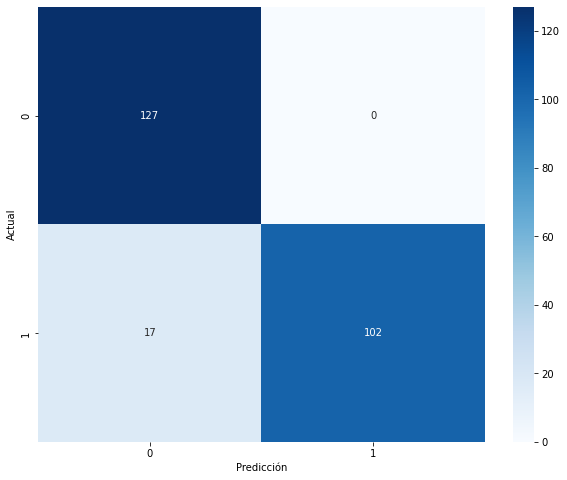

In [21]:
#Realizamos predicciones en el conjunto de prueba
y_pred = knn.predict(X_test)

# Creamos la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

#Graficamos nuestra matriz de confusión
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.show()

### Modelo de regresion logistica

In [22]:
#Asginamos variables a los datos de entrada y de salida
X = concatenado[['V10', 'V12', 'V14', 'V17', 'V2', 'V4', 'V11']].values
y = concatenado['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#Escalamos los datos
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Establecemos el modelo
logre = LogisticRegression(C=100, solver='liblinear')
logre.fit(X_train, y_train)
print('Precisión de la regresión logística en el conjunto de entrenamiento:', round(logre.score(X_train, y_train), 2))
print('Precisión de la regresión logística en el conjunto de prueba:', round(logre.score(X_train, y_train), 2))

Precisión de la regresión logística en el conjunto de entrenamiento: 0.94
Precisión de la regresión logística en el conjunto de prueba: 0.94


Ahora buscaremos los mejores hiperparámetros

In [23]:
# Definimos los hiperparámetros y sus posibles valores
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Valores posibles para el parámetro de regularización C
    'solver': ['liblinear', 'lbfgs', 'sag', 'newton-cg']  # Valores posibles para el solver
}
# Realizamos la búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(logre, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Imprimimos los mejores hiperparámetros y el rendimiento del mejor modelo
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor precisión en validación cruzada:", round(grid_search.best_score_, 2))

# Evaluamos el modelo en el conjunto de prueba
test_score = grid_search.score(X_test, y_test)
print("Precisión en el conjunto de prueba:", round(test_score, 2))

c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Mejores hiperparámetros: {'C': 100, 'solver': 'liblinear'}
Mejor precisión en validación cruzada: 0.94
Precisión en el conjunto de prueba: 0.95


c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


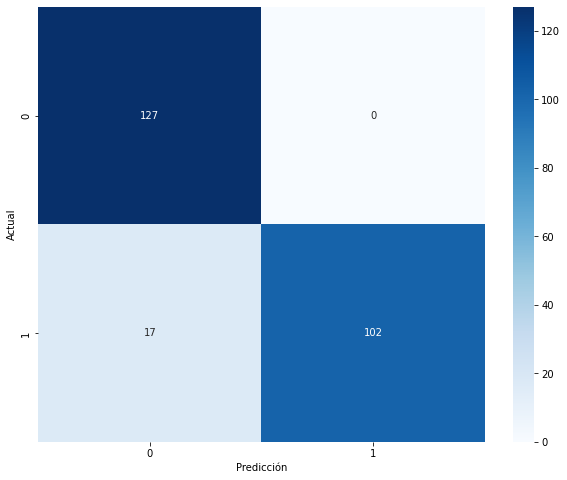

In [24]:
y_pres = logre.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.show()

### Modelo de arboles de desicion

In [25]:
X = concatenado[['V10', 'V12', 'V14', 'V17', 'V2', 'V4', 'V11']].values
y = concatenado['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

tree = DecisionTreeClassifier(max_depth= 10, min_samples_leaf= 4, min_samples_split= 2)
tree.fit(X_train, y_train)
print('Precisión del modelo de árboles de desición en el conjunto de entrenamiento: ', round(tree.score(X_train, y_train), 2))
print('Precisión del modelo de árboles de desición en el conjunto de prueba: ', round(tree.score(X_test, y_test), 2))

Precisión del modelo de árboles de desición en el conjunto de entrenamiento:  0.97
Precisión del modelo de árboles de desición en el conjunto de prueba:  0.93


In [26]:
# Definimos los hiperparámetros y sus posibles valores
param_grid = {
    'max_depth': [None, 5, 10, 15],  # Valores posibles para la profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],  # Valores posibles para el número mínimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': [1, 2, 4]  # Valores posibles para el número mínimo de muestras requeridas en un nodo hoja
}

# Realizamos la búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Imprimimos los mejores hiperparámetros y el rendimiento del mejor modelo
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor precisión en validación cruzada:", round(grid_search.best_score_, 2))

# Evaluamos el modelo en el conjunto de prueba
test_score = grid_search.score(X_test, y_test)
print("Precisión en el conjunto de prueba:", round(test_score, 2))

Mejores hiperparámetros: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Mejor precisión en validación cruzada: 0.93
Precisión en el conjunto de prueba: 0.93


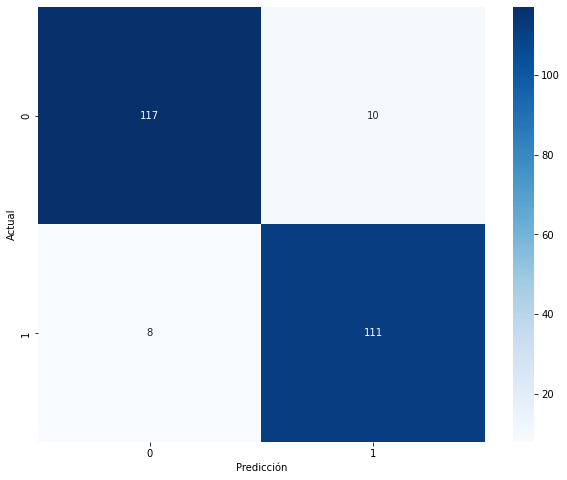

In [27]:
y_pred = tree.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.show()

### Maquina de vectores de soporte (SVM)

In [28]:
X = concatenado[['V10', 'V12', 'V14', 'V17', 'V2', 'V4', 'V11']].values
y = concatenado['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Creamos el modelo SVM
svm_model = SVC(C=3, degree=1, kernel='linear')
svm_model.fit(X_train, y_train)

print('Precisión del modelo de máquina de vectores de soporte en el conjunto de entrenamiento: ', round(svm_model.score(X_train, y_train), 2))
print('Precisión del modelo de máquina de vectores de soporte en el conjunto de prueba: ', round(svm_model.score(X_test, y_test), 2))

Precisión del modelo de máquina de vectores de soporte en el conjunto de entrenamiento:  0.93
Precisión del modelo de máquina de vectores de soporte en el conjunto de prueba:  0.96


In [29]:
# Definimos los hiperparámetros y sus posibles valores
param_grid = {
    'C': [1, 3, 5, 7],  # Valores posibles para la profundidad máxima del árbol
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Valores posibles para el número mínimo de muestras requeridas para dividir un nodo
    'degree': [1, 2, 3, 4]  # Valores posibles para el número mínimo de muestras requeridas en un nodo hoja
}

# Realizamos la búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(svm_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Imprimimos los mejores hiperparámetros y el rendimiento del mejor modelo
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor precisión en validación cruzada:", round(grid_search.best_score_, 2))

# Evaluamos el modelo en el conjunto de prueba
test_score = grid_search.score(X_test, y_test)
print("Precisión en el conjunto de prueba:", round(test_score, 2))

Mejores hiperparámetros: {'C': 3, 'degree': 1, 'kernel': 'linear'}
Mejor precisión en validación cruzada: 0.93
Precisión en el conjunto de prueba: 0.96


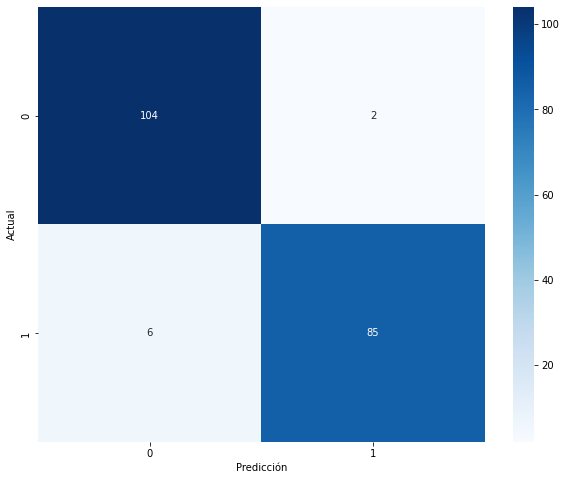

In [30]:
y_pred = svm_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.show()

### XGBoost

In [31]:
X = concatenado[['V10', 'V12', 'V14', 'V17', 'V2', 'V4', 'V11']].values
y = concatenado['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Creamos el modelo SVM
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

print('Precisión del modelo XGBoost en el conjunto de entrenamiento: ', round(xgb_model.score(X_train, y_train), 2))
print('Precisión del modelo XGBoost en el conjunto de prueba: ', round(xgb_model.score(X_test, y_test), 2))

Precisión del modelo XGBoost en el conjunto de entrenamiento:  1.0
Precisión del modelo XGBoost en el conjunto de prueba:  0.96


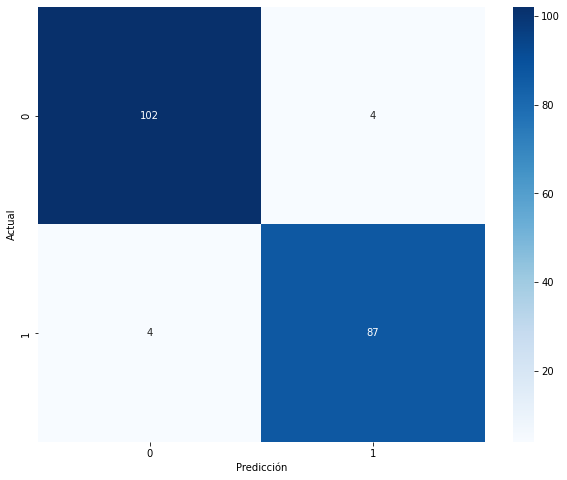

In [32]:
y_pred = xgb_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.show()

### Red Neuronal

In [33]:
# Seleccionar las características
X = concatenado[['V10', 'V12', 'V14', 'V17', 'V2', 'V4', 'V11']].values
y = concatenado['Class'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Escalar los datos
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear el modelo de red neuronal
model = keras.Sequential([
    layers.Input(shape=X_train.shape[1]),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=1)

# Evaluar el modelo en el conjunto de entrenamiento y prueba
train_accuracy = model.evaluate(X_train, y_train, verbose=0)[1]
test_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]

print('Precisión del modelo de red neuronal en el conjunto de entrenamiento:', round(train_accuracy, 2))
print('Precisión del modelo de red neuronal en el conjunto de prueba:', round(test_accuracy, 2))


Epoch 1/1000
25/25 [==============================] - 1s 4ms/step - loss: 0.5478 - accuracy: 0.8577
Epoch 2/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.3505 - accuracy: 0.9301
Epoch 3/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.2529 - accuracy: 0.9301
Epoch 4/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.2070 - accuracy: 0.9339
Epoch 5/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1894 - accuracy: 0.9301
Epoch 6/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.1802 - accuracy: 0.9327
Epoch 7/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1747 - accuracy: 0.9327
Epoch 8/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1702 - accuracy: 0.9327
Epoch 9/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1680 - accuracy: 0.9301
Epoch 10/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1650 - accuracy: 0.9339

Epoch 1/10
25/25 [==============================] - 0s 3ms/step - loss: 2.3739e-04 - accuracy: 1.0000
Epoch 2/10
25/25 [==============================] - 0s 3ms/step - loss: 2.2363e-04 - accuracy: 1.0000
Epoch 3/10
25/25 [==============================] - 0s 3ms/step - loss: 2.2328e-04 - accuracy: 1.0000
Epoch 4/10
25/25 [==============================] - 0s 3ms/step - loss: 2.1735e-04 - accuracy: 1.0000
Epoch 5/10
 1/25 [>.............................] - ETA: 0s - loss: 5.0525e-05 - accuracy: 1.0000

25/25 [==============================] - 0s 5ms/step - loss: 2.1738e-04 - accuracy: 1.0000
Epoch 6/10
25/25 [==============================] - 0s 4ms/step - loss: 2.2100e-04 - accuracy: 1.0000
Epoch 7/10
25/25 [==============================] - 0s 3ms/step - loss: 2.1410e-04 - accuracy: 1.0000
Epoch 8/10
25/25 [==============================] - 0s 3ms/step - loss: 2.1938e-04 - accuracy: 1.0000
Epoch 9/10
25/25 [==============================] - 0s 3ms/step - loss: 2.0984e-04 - accuracy: 1.0000
Epoch 10/10
25/25 [==============================] - 0s 3ms/step - loss: 2.1257e-04 - accuracy: 1.0000


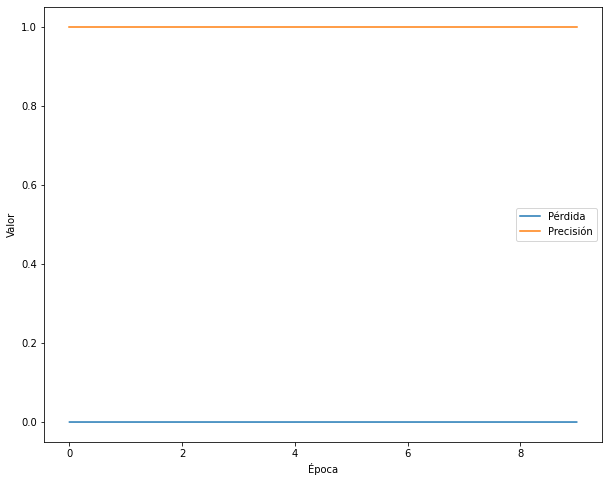

In [34]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Graficar la pérdida y la precisión durante el entrenamiento
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'], label='Pérdida')
plt.plot(history.history['accuracy'], label='Precisión')
plt.xlabel('Época')
plt.ylabel('Valor')
plt.legend()
plt.show()

7/7 [==============================] - 0s 2ms/step


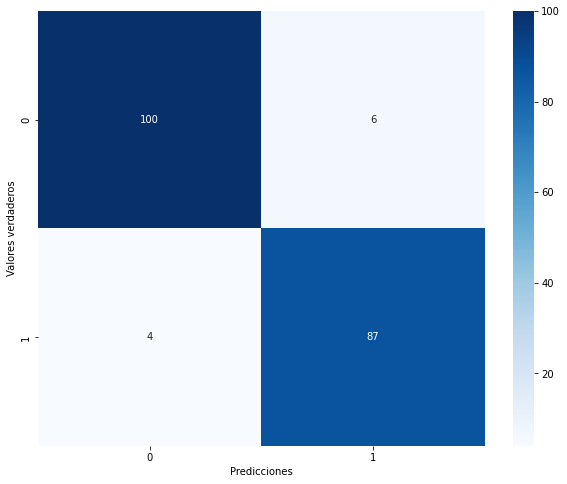

In [35]:
# Obtener las probabilidades de cada clase
y_pred_prob = model.predict(X_test)

# Aplicar un umbral para obtener las predicciones binarias
umbral = 0.5
y_pred = (y_pred_prob > umbral).astype(int)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicciones')
plt.ylabel('Valores verdaderos')
plt.show()

7/7 [==============================] - 0s 2ms/step


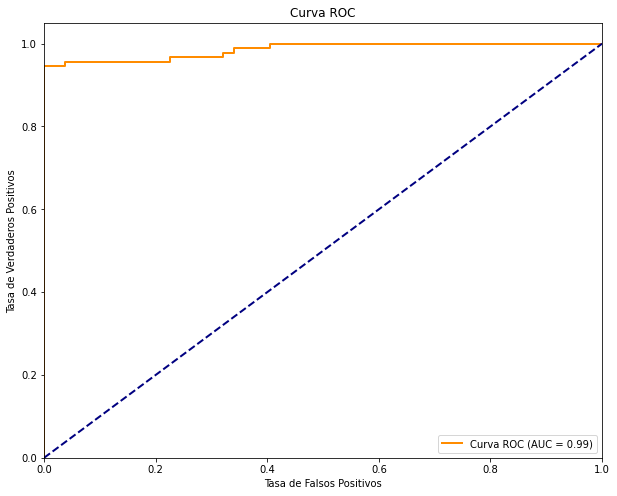

In [36]:
# Obtener las probabilidades de clase positiva
y_pred_prob = model.predict(X_test)

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()